## Lecture 10 - Big Data Classification

### 

In [102]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [103]:
df = pd.read_csv('heart.csv')

In [104]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


### EDA

In [105]:
print(df.head())
print(df.shape)
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca        thal  target  
0   0       fixed       0  
1   3      normal       1  
2   2  reversible       0  
3   0      normal       0  
4   0      normal       0  
(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int6

### 1. Target class distribution

In [106]:
print(df['target'].value_counts())

0    220
1     83
Name: target, dtype: int64


### Step 4
### 2. Histogram of trestbps attribute

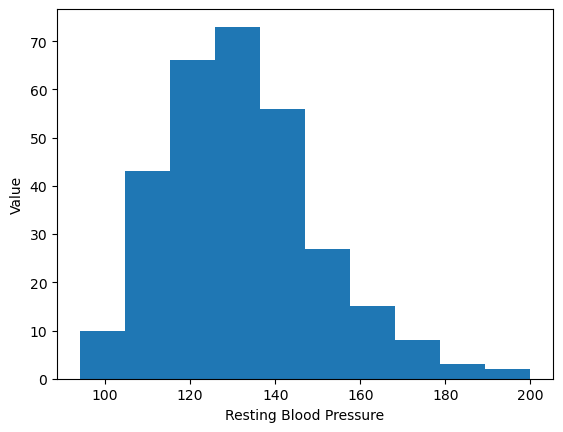

In [107]:
plt.hist(df['trestbps'])
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Value')
plt.show()

### 3. Outlier of all attributes

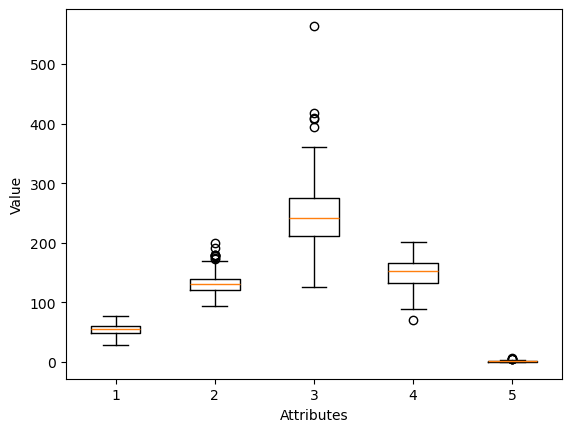

In [108]:
data_to_boxplot = [df['age'], df['trestbps'], df['chol'], df['thalach'], df['oldpeak']]
plt.boxplot(data_to_boxplot)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

### 4. Missing values

In [109]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Step 5
### Splitting into training and test datasets to check out the accuracy

In [110]:
df = df.drop(columns=['thal'])

In [111]:
training_points = df.drop(columns=['target'])
training_labels = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    training_points,
    training_labels,
    test_size=0.3,
    random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(212, 12)
(212,)
(91, 12)
(91,)


In [112]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
221,64,1,1,170,227,0,2,155,0,0.6,2,0
244,68,1,4,144,193,1,0,141,0,3.4,2,2
99,52,1,1,152,298,1,0,178,0,1.2,2,0
184,46,1,4,120,249,0,2,144,0,0.8,1,0
48,51,0,3,140,308,0,2,142,0,1.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
58,53,0,4,138,234,0,2,160,0,0.0,1,0
87,35,1,4,120,198,0,0,130,1,1.6,2,0
197,57,1,4,110,201,0,0,126,1,1.5,2,0
174,67,0,3,152,277,0,0,172,0,0.0,1,1


### Step 6
### Training the model (k=5) and check the accuracy

In [113]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0]
[[54  3]
 [26  8]]
0.6813186813186813


### Step 7
### Improving accuracy by tuning hyperparameters (number of k)

[0.6923076923076923, 0.6593406593406593, 0.6923076923076923, 0.6593406593406593, 0.6813186813186813, 0.6593406593406593, 0.6813186813186813, 0.6593406593406593, 0.6593406593406593, 0.6593406593406593, 0.6703296703296703, 0.6593406593406593, 0.6483516483516484, 0.6483516483516484, 0.6703296703296703, 0.6593406593406593, 0.6593406593406593, 0.6373626373626373, 0.6373626373626373, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6373626373626373, 0.6373626373626373, 0.6373626373626373, 0.6263736263736264, 0.6263736263736264, 0.6373626373626373, 0.6373626373626373, 0.6373626373626373, 0.6373626373626373, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264]


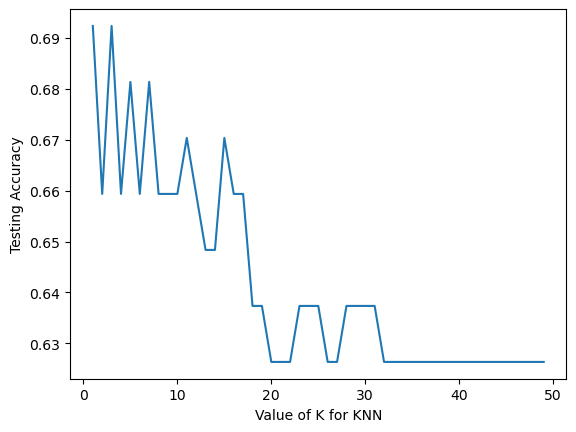

In [114]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

### Step 8
### Changing ratios of training and test datasets

In [115]:
training_points = df.drop(columns=['target'])
training_labels = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    training_points,
    training_labels,
    test_size=0.2,
    random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(242, 12)
(242,)
(61, 12)
(61,)


In [116]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
[[39  4]
 [13  5]]
0.7213114754098361


[0.7213114754098361, 0.7540983606557377, 0.7377049180327869, 0.7704918032786885, 0.7213114754098361, 0.7213114754098361, 0.7213114754098361, 0.7049180327868853, 0.6885245901639344, 0.6885245901639344, 0.6721311475409836, 0.7049180327868853, 0.6557377049180327, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853, 0.6721311475409836, 0.6885245901639344, 0.6721311475409836, 0.6885245901639344, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.6885245901639344, 0.7049180327868853, 0.7213114754098361, 0.7213114754098361, 0.7213114754098361, 0.7213114754098361, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853, 0.7213114754098361, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853, 0.6885245901639344, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853, 0.7213114754098361, 0.7049180327868853, 0.7049180327868853, 0.6885245901639344, 0.7049180327868853, 0.6885245901639344]


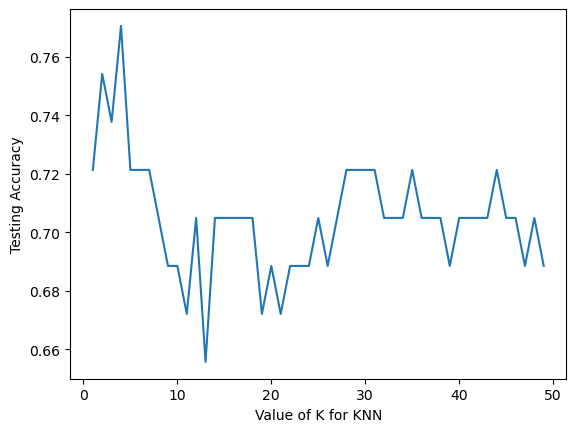

In [117]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

### Step 9
### Standard Scaling

In [121]:
from sklearn.preprocessing import StandardScaler

#Create copy of dataset.
df_model = df.copy()

#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = StandardScaler()

features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

training_points = df_model.drop(columns=['target'])
training_labels = df_model['target']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    training_points,
    training_labels,
    test_size=0.2,
    random_state=4)


In [123]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0]
[[39  4]
 [ 7 11]]
0.819672131147541


[0.7704918032786885, 0.7704918032786885, 0.819672131147541, 0.8032786885245902, 0.819672131147541, 0.7868852459016393, 0.819672131147541, 0.8032786885245902, 0.8032786885245902, 0.7868852459016393, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.819672131147541, 0.7868852459016393, 0.819672131147541, 0.7868852459016393, 0.7868852459016393, 0.7868852459016393, 0.819672131147541, 0.819672131147541, 0.819672131147541, 0.819672131147541, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.819672131147541, 0.8032786885245902, 0.8032786885245902, 0.7868852459016393, 0.7704918032786885, 0.8032786885245902, 0.7868852459016393, 0.8032786885245902, 0.7868852459016393, 0.8032786885245902, 0.7868852459016393, 0.7868852459016393, 0.7868852459016393, 0.7868852459016393, 0.7868852459016393, 0.8032786885245902, 0.7868852459016393, 0.7868852459016393, 0.7868852459016393, 0.7868852459016393]


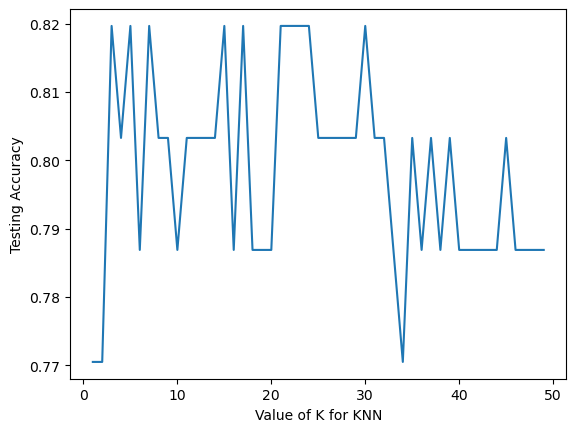

In [124]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()